In [37]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import shapiro, kstest, norm, probplot
import seaborn as sns
import plotly.express as px

In [38]:
file_path = Path('Resources/Heart_Disease.csv')
df = pd.read_csv(file_path)
df.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,male,39,4,no,0,0,0,0,no,195,106.0,70.0,26.97,80,77,no
1,female,46,2,no,0,0,0,0,no,250,121.0,81.0,28.73,95,76,no
2,male,48,1,yes,20,0,0,0,no,245,127.5,80.0,25.34,75,70,no
3,female,61,3,yes,30,0,0,1,no,225,150.0,95.0,28.58,65,103,yes
4,female,46,3,yes,23,0,0,0,no,285,130.0,84.0,23.10,85,85,no


In [39]:
# Mapping yes/no and female/male columns to binary numeric
df['CHDRisk'] = df['CHDRisk'].map({'yes': 1, 'no': 0})
df['diabetes'] = df['diabetes'].map({'yes': 1, 'no': 0})
df['smokingStatus'] = df['smokingStatus'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

df.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,1.0,39,4,0.0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0.0,46,2,0.0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1.0,48,1,1.0,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0.0,61,3,1.0,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0.0,46,3,1.0,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [40]:
# Checking nulls
null_values = df.isnull().sum()
null_values

sex                11
age                 0
education           0
smokingStatus      13
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
CHDRisk             0
dtype: int64

In [41]:
print(f'The number of rows before dropping null values is {df.shape[0]}')

The number of rows before dropping null values is 3674


In [42]:
df_cleaned = df.dropna()

In [43]:
print(f'The number of rows after dropping null values is {df_cleaned.shape[0]}')

The number of rows after dropping null values is 3652


In [44]:
# Investigating if there's duplicate rows in the data set
df_cleaned.duplicated().sum().sum()
df_cleaned[df_cleaned.duplicated()]

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
3658,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3659,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3660,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3661,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3662,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3663,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3664,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3665,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3666,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1
3667,1.0,54,3,1.0,25,0,0,0,0,208,137.5,82.5,25.58,75,63,1


In [45]:
# Dropping the duplicate rows 
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.duplicated().sum()

C:\Users\tylio\AppData\Local\Temp\ipykernel_13512\1688593351.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0

In [72]:
df_cleaned.to_csv("cleaned_data.csv")

# Exploring the target variable

## Analysing the distribution of the target variable

c:\Users\tylio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



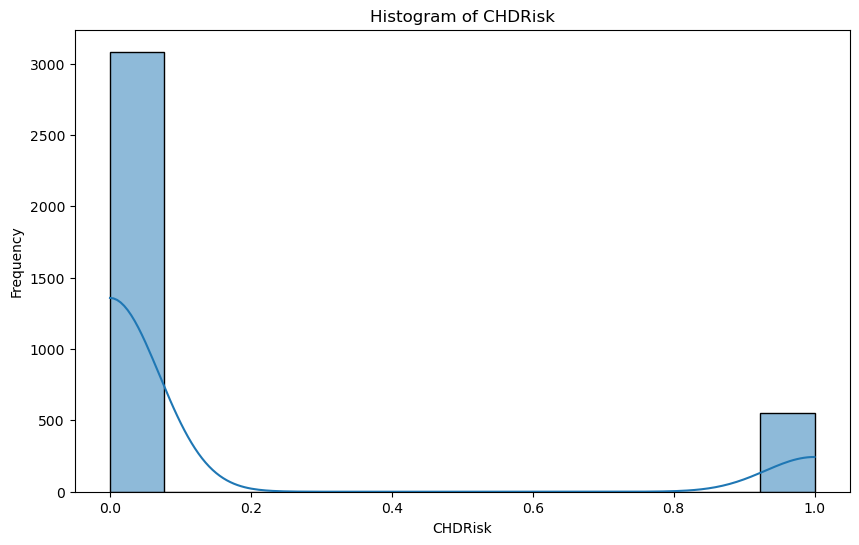

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['CHDRisk'], kde=True)
plt.xlabel('CHDRisk')
plt.ylabel('Frequency')
plt.title('Histogram of CHDRisk')
plt.show()

In [48]:
df_cleaned['CHDRisk'].value_counts()

CHDRisk
0    3084
1     553
Name: count, dtype: int64

In [49]:
stat, p = shapiro(df_cleaned['CHDRisk'])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

Shapiro-Wilk Test: Statistics=0.429, p=0.000


Interpreting the Shapiro-Wilk test: a test statistic of 0.43 indicates the target variable is not normally distributed.

## Analyzing the IID (Independent and Identically Distributed) nature of the target variable

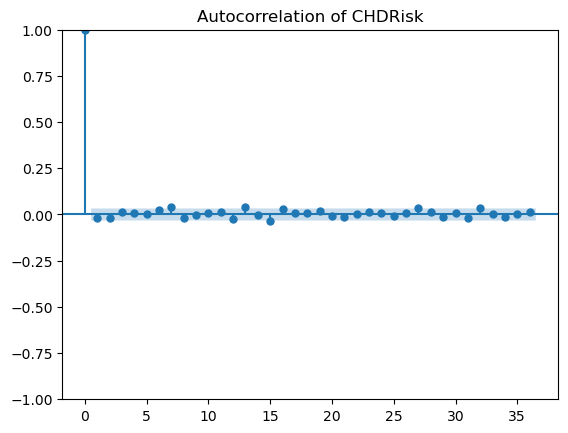

In [50]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation function
plot_acf(df_cleaned['CHDRisk'])
plt.title('Autocorrelation of CHDRisk')
plt.show()


In [51]:
# Splitting the data and comparing to check for identical distribtuion
from scipy.stats import ks_2samp

# Split data into two halves
first_half = df_cleaned['CHDRisk'].iloc[:len(df)//2]
second_half = df_cleaned['CHDRisk'].iloc[len(df)//2:]

# Perform Kolmogorov-Smirnov test
stat, p_value = ks_2samp(first_half, second_half)
print('Kolmogorov-Smirnov Test: Statistics=%.3f, p=%.3f' % (stat, p_value))

# Interpretation
if p_value > 0.05:
    print("The two halves of the data come from the same distribution (fail to reject H0)")
else:
    print("The two halves of the data do not come from the same distribution (reject H0)")


Kolmogorov-Smirnov Test: Statistics=0.001, p=1.000
The two halves of the data come from the same distribution (fail to reject H0)


Interpretation: the target variable is identically distributed. IID is an important assumption that all ML is built off of, but is more relevant to ratio and continuous data than categorical outcomes.

# Exploring correlation within the dataset

In [52]:
# Correlation matrix to see which variables are highly correlated
corr_matrix = df_cleaned.corr()
corr_matrix

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
sex,1.000000,-0.026480,0.017089,0.207675,0.332224,-0.054053,-0.002206,0.000304,0.013859,-0.070794,-0.046146,0.051677,0.074423,-0.116048,0.004725,0.092570
age,-0.026480,1.000000,-0.159539,-0.210166,-0.188074,0.134597,0.051074,0.306814,0.107806,0.267608,0.388420,0.208466,0.136973,-0.002392,0.117708,0.231726
education,0.017089,-0.159539,1.000000,0.024852,0.012788,-0.016717,-0.030360,-0.079354,-0.036604,-0.013088,-0.124291,-0.058124,-0.135447,-0.063532,-0.029221,-0.065294
smokingStatus,0.207675,-0.210166,0.024852,1.000000,0.774130,-0.050858,-0.038313,-0.106228,-0.042581,-0.049090,-0.132376,-0.114013,-0.158734,0.050426,-0.051519,0.020456
cigsPerDay,0.332224,-0.188074,0.012788,0.774130,1.000000,-0.045699,-0.036432,-0.068776,-0.036346,-0.028820,-0.092707,-0.054710,-0.084729,0.064422,-0.051728,0.054620
BPMeds,-0.054053,0.134597,-0.016717,-0.050858,-0.045699,1.000000,0.113679,0.262204,0.050483,0.092754,0.272239,0.199594,0.108038,0.010789,0.055738,0.086181
prevalentStroke,-0.002206,0.051074,-0.030360,-0.038313,-0.036432,0.113679,1.000000,0.066154,0.009909,0.012708,0.061307,0.056172,0.036586,-0.017169,0.016342,0.048582
prevalentHyp,0.000304,0.306814,-0.079354,-0.106228,-0.068776,0.262204,0.066154,1.000000,0.080031,0.166769,0.697347,0.616939,0.302673,0.146759,0.085675,0.180842
diabetes,0.013859,0.107806,-0.036604,-0.042581,-0.036346,0.050483,0.009909,0.080031,1.000000,0.047906,0.098494,0.044743,0.080647,0.060245,0.611164,0.096247
totChol,-0.070794,0.267608,-0.013088,-0.049090,-0.028820,0.092754,0.012708,0.166769,0.047906,1.000000,0.219491,0.173980,0.119351,0.092422,0.048440,0.091655


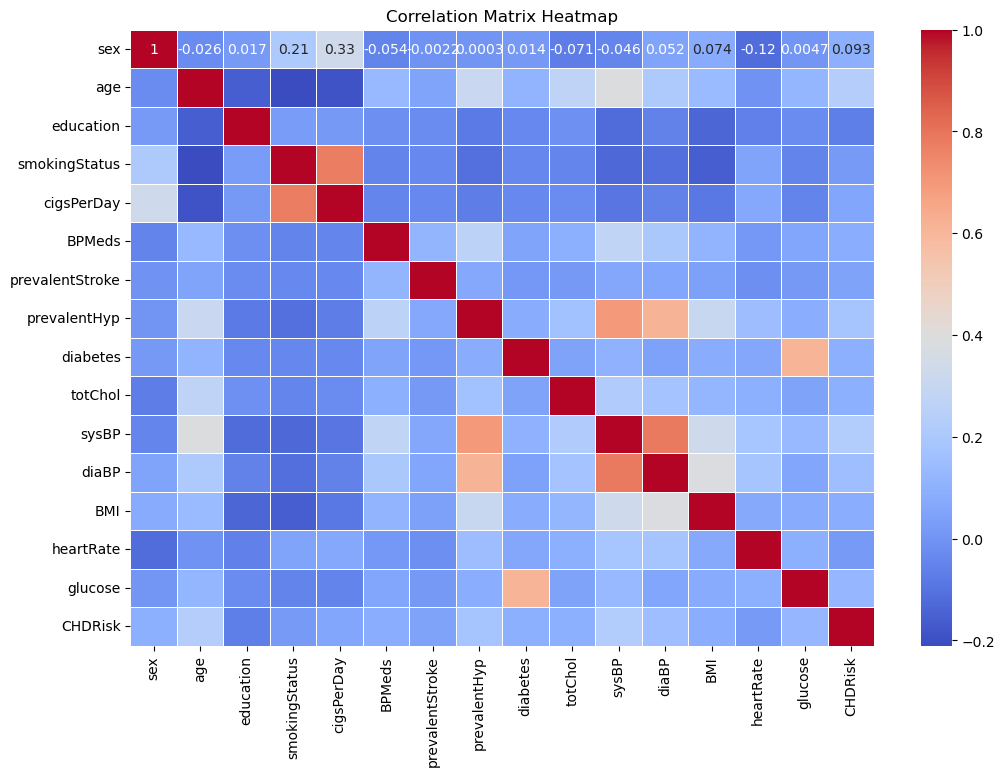

In [53]:
# Visualizing the correlation matrix for eaasier interpretation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Exploring multicolinearity within the dataset

In [54]:
# Calculating the Variance Inflation Factor (VIF) to detect multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
features = df_cleaned.drop(columns=['CHDRisk'])
vif_data = pd.DataFrame()
vif_data['Feature'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

# Display VIF data
print(vif_data)


            Feature         VIF
0               sex    2.162943
1               age   40.594734
2         education    4.649186
3     smokingStatus    4.940616
4        cigsPerDay    4.301054
5            BPMeds    1.141968
6   prevalentStroke    1.023491
7      prevalentHyp    2.391362
8          diabetes    1.586368
9           totChol   32.106800
10            sysBP  137.826436
11            diaBP  136.242724
12              BMI   45.312691
13        heartRate   38.574423
14          glucose   19.758047


VIF values greater than 10 suggest high multicollinearity, which can inflate the standard errors and make it difficult to determine the individual effect of correlated predictors. These features might need to be removed or combined to address multicollinearity.

## Combining systolic and diastolic blood pressure to create a single indicator: Mean Arterial Blood Pressure (MAP)

In an effort to reduce multicolinearity in the dataset, research was conducted to see if systolic and diastolic blood pressure could be mathematically combined to instead be represented by a single indicator. The paper cited below outlines the mathematical formula which for mean arterial blood pressure (MAP).

MAP = DP + 1/3(SP – DP)

DeMers D, Wachs D. Physiology, Mean Arterial Pressure. [Updated 2023 Apr 10]. In: StatPearls [Internet]. Treasure Island (FL): StatPearls Publishing; 2024 Jan-. Available from: https://www.ncbi.nlm.nih.gov/books/NBK538226/

In [55]:
# Adding Mean Arterial Pressure to the dataset
df_cleaned.loc[:,'MAP'] = df_cleaned['diaBP'] + 1/3 * (df_cleaned['sysBP'] - df_cleaned['diaBP'])
df_cleaned.head()

C:\Users\tylio\AppData\Local\Temp\ipykernel_13512\249313486.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk,MAP
0,1.0,39,4,0.0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0,82.000000
1,0.0,46,2,0.0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0,94.333333
2,1.0,48,1,1.0,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0,95.833333
3,0.0,61,3,1.0,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1,113.333333
4,0.0,46,3,1.0,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0,99.333333


In [56]:
# Dropping systolic and diastolic blood pressure columns from the dataset
df_cleaned.drop(columns=['diaBP', 'sysBP'], inplace=True)
df_cleaned.head()

C:\Users\tylio\AppData\Local\Temp\ipykernel_13512\1644339689.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,CHDRisk,MAP
0,1.0,39,4,0.0,0,0,0,0,0,195,26.97,80,77,0,82.000000
1,0.0,46,2,0.0,0,0,0,0,0,250,28.73,95,76,0,94.333333
2,1.0,48,1,1.0,20,0,0,0,0,245,25.34,75,70,0,95.833333
3,0.0,61,3,1.0,30,0,0,1,0,225,28.58,65,103,1,113.333333
4,0.0,46,3,1.0,23,0,0,0,0,285,23.10,85,85,0,99.333333


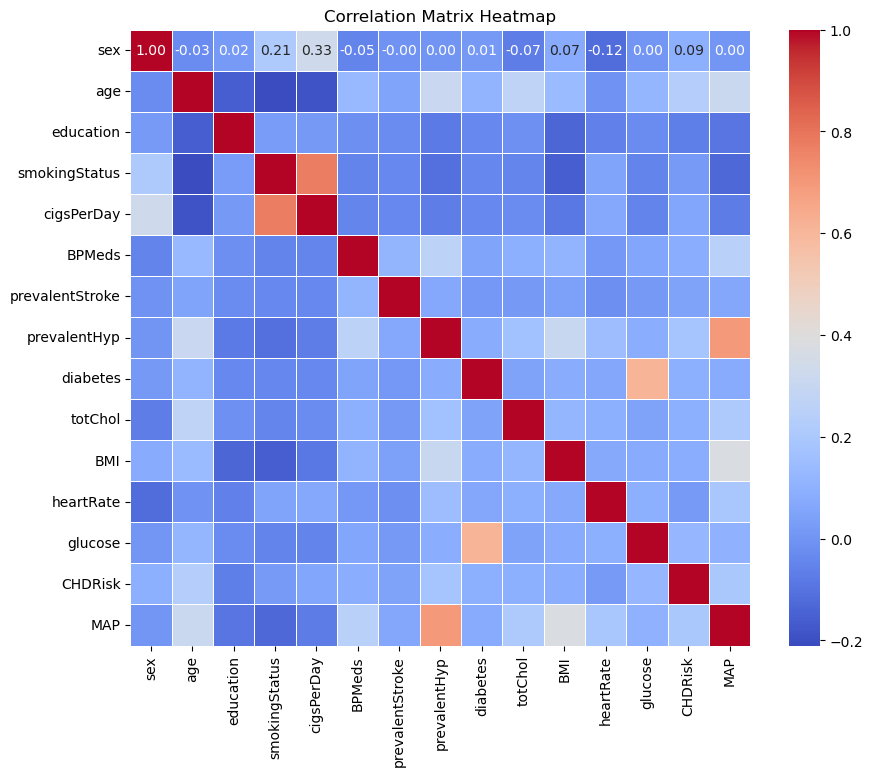

In [57]:
# Visualizing the correlation matrix
corr_matrix = df_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [58]:
corr_matrix

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,CHDRisk,MAP
sex,1.000000,-0.026480,0.017089,0.207675,0.332224,-0.054053,-0.002206,0.000304,0.013859,-0.070794,0.074423,-0.116048,0.004725,0.092570,0.004989
age,-0.026480,1.000000,-0.159539,-0.210166,-0.188074,0.134597,0.051074,0.306814,0.107806,0.267608,0.136973,-0.002392,0.117708,0.231726,0.311994
education,0.017089,-0.159539,1.000000,0.024852,0.012788,-0.016717,-0.030360,-0.079354,-0.036604,-0.013088,-0.135447,-0.063532,-0.029221,-0.065294,-0.095113
smokingStatus,0.207675,-0.210166,0.024852,1.000000,0.774130,-0.050858,-0.038313,-0.106228,-0.042581,-0.049090,-0.158734,0.050426,-0.051519,0.020456,-0.129967
cigsPerDay,0.332224,-0.188074,0.012788,0.774130,1.000000,-0.045699,-0.036432,-0.068776,-0.036346,-0.028820,-0.084729,0.064422,-0.051728,0.054620,-0.077191
BPMeds,-0.054053,0.134597,-0.016717,-0.050858,-0.045699,1.000000,0.113679,0.262204,0.050483,0.092754,0.108038,0.010789,0.055738,0.086181,0.248096
prevalentStroke,-0.002206,0.051074,-0.030360,-0.038313,-0.036432,0.113679,1.000000,0.066154,0.009909,0.012708,0.036586,-0.017169,0.016342,0.048582,0.062045
prevalentHyp,0.000304,0.306814,-0.079354,-0.106228,-0.068776,0.262204,0.066154,1.000000,0.080031,0.166769,0.302673,0.146759,0.085675,0.180842,0.693639
diabetes,0.013859,0.107806,-0.036604,-0.042581,-0.036346,0.050483,0.009909,0.080031,1.000000,0.047906,0.080647,0.060245,0.611164,0.096247,0.074648
totChol,-0.070794,0.267608,-0.013088,-0.049090,-0.028820,0.092754,0.012708,0.166769,0.047906,1.000000,0.119351,0.092422,0.048440,0.091655,0.207210


In [59]:
# Calculating VIF again to see if MAP has reduced multicolinearity
features = df_cleaned.drop(columns=['CHDRisk'])
vif_data = pd.DataFrame()
vif_data['Feature'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

# Display VIF data
print(vif_data)

            Feature        VIF
0               sex   2.119547
1               age  38.238111
2         education   4.600265
3     smokingStatus   4.939607
4        cigsPerDay   4.300875
5            BPMeds   1.133212
6   prevalentStroke   1.023296
7      prevalentHyp   2.286941
8          diabetes   1.585632
9           totChol  32.101599
10              BMI  44.479946
11        heartRate  38.532901
12          glucose  19.693970
13              MAP  85.397460


Calculating MAP helped to reduce multicolinearity, but the following variables still exhibit high VIF values and multicollinearity:
* MAP (strongly correlated to prevalentHyp at r = 0.69)
* Glucose (strongly correlated to diabetes at r = 0.61)
* BMI (weakly correlated to MAP at r = 0.38)
* Age (weakly correlated to prevalentHyp and MAP at r = 0.31)
* totalChol (weakly correlated to age at r = 0.27 and MAP at r = 0.21)
* heartRate (very weakly correlated to MAP at r = 0.19 and prevalentHype at r = 0.15)

In [60]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# Performing linear regression for each predictor to compute r squared value
# Initialize a dictionary to store R-squared values
r2_dict = {}

# Loop over each predictor
for i, column in enumerate(features.columns):
    # Define the target variable (current predictor)
    y = features.iloc[:, i]
    # Define the predictors (all other columns)
    X = features.drop(columns=column)
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict the target variable
    y_pred = model.predict(X)
    
    # Calculate R-squared
    r2 = r2_score(y, y_pred)
    r2_dict[column] = r2

# Display R-squared values
print("R-squared values for each predictor regressed on all other predictors:")
for key, value in r2_dict.items():
    print(f"{key}: {value:.4f}")

R-squared values for each predictor regressed on all other predictors:
sex: 0.1563
age: 0.2143
education: 0.0460
smokingStatus: 0.6134
cigsPerDay: 0.6346
BPMeds: 0.0946
prevalentStroke: 0.0171
prevalentHyp: 0.5004
diabetes: 0.3766
totChol: 0.1038
BMI: 0.1829
heartRate: 0.0859
glucose: 0.3815
MAP: 0.5371


R-squared Value (r2): Represents the proportion of variance in the target variable explained by the predictors.

# Analysis of the Data

In [61]:
plt = px.pie(df_cleaned, names='sex', title='Gender Distribution')
plt.show()

In [62]:
plt = px.histogram(df_cleaned, x='age', title='Age Distribution')
plt.show()

In [63]:
plt = px.pie(df_cleaned, names='smokingStatus', title="Smokers vs Non Smokers")
plt.show()

In [64]:
plt = px.histogram(df_cleaned, x='cigsPerDay', title='Cigs Per Day')
plt.add_vline(df_cleaned['cigsPerDay'].mean(), line_color='red')
plt.show()

In [65]:
plt = px.pie(df_cleaned, names='BPMeds', title="BP Medication Distribution")
plt.show()

In [66]:
plt = px.pie(df_cleaned, names='diabetes', title= "Diabetic Patients")
plt.show()

In [67]:
plt = px.pie(df_cleaned, names='prevalentStroke', title="Prevalent Stroke")
plt.show()

In [68]:
plt = px.pie(df_cleaned, names='prevalentHyp', title="Prevalent Hypertension")
plt.show()

In [69]:
plt = px.pie(df_cleaned, names='CHDRisk', title="CHD Risk")
plt.show()

In [70]:
# Create the histogram
fig = px.histogram(df_cleaned, x='sex', color='smokingStatus', title='Gender vs Smoking Status', barmode='group')

fig.show()